In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
X,y = make_circles(n_samples=1000, noise=0.1,factor=0.65, random_state=42)

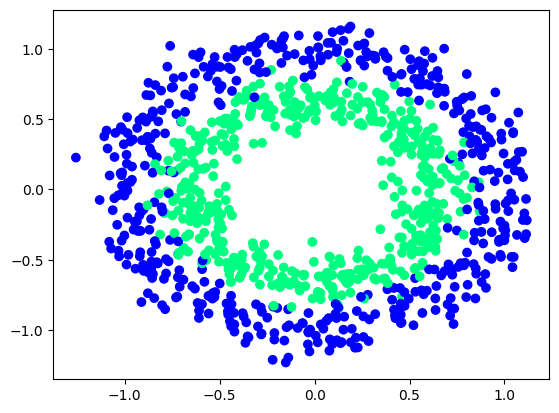

In [7]:
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter')

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(800, 2)

# Without Early Stopping

In [10]:
model = Sequential()

model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, batch_size=50, epochs=1000, validation_split=0.2)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.4650 - loss: 0.6913 - val_accuracy: 0.4750 - val_loss: 0.6907
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4803 - loss: 0.6889 - val_accuracy: 0.4688 - val_loss: 0.6892
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4992 - loss: 0.6868 - val_accuracy: 0.4688 - val_loss: 0.6877
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5049 - loss: 0.6838 - val_accuracy: 0.4688 - val_loss: 0.6860
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4940 - loss: 0.6835 - val_accuracy: 0.4688 - val_loss: 0.6843
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5042 - loss: 0.6789 - val_accuracy: 0.4688 - val_loss: 0.6821
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5042 - loss: 0.6760 - val_accuracy: 0.4688 - val_loss: 0.6797
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5275 - loss: 0.6696 - val_accuracy: 

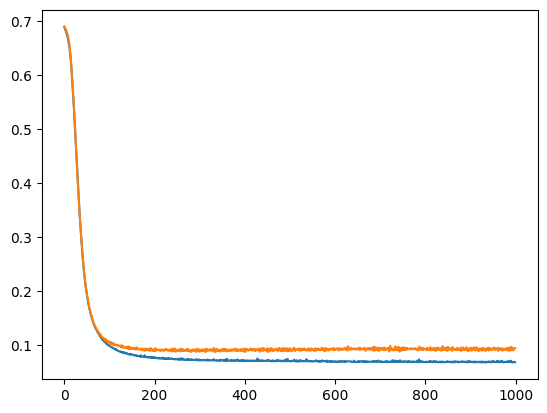

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Applying Early Stopping

In [19]:
model = Sequential()

model.add(Dense(20, activation='relu', input_dim=2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [21]:
callbacks = EarlyStopping(
    monitor='val_loss',
    min_delta = 0.0001,
    patience=5,
    verbose=1,
    restore_best_weights=True
)

In [22]:
history = model.fit(X_train, y_train, batch_size=50, epochs=1000, validation_split=0.2,callbacks=callbacks)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5103 - loss: 0.7162 - val_accuracy: 0.5437 - val_loss: 0.6981
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4755 - loss: 0.7099 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4726 - loss: 0.6936 - val_accuracy: 0.4625 - val_loss: 0.6902
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4798 - loss: 0.6916 - val_accuracy: 0.4812 - val_loss: 0.6874
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4998 - loss: 0.6865 - val_accuracy: 0.4625 - val_loss: 0.6851
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4731 - loss: 0.6847 - val_accuracy: 0.4625 - val_loss: 0.6827
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4448 - loss: 0.6826 - val_accuracy: 0.4688 - val_loss: 0.6804
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5167 - loss: 0.6730 - val_accuracy: 

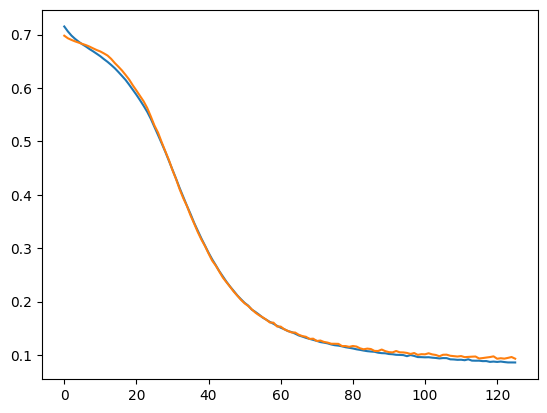

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### As we can see best time to stop training is 126 epoch and not 1000.